CASE - 

Cosider there is very famous mall, this mall want to get insights about their customer. They have their customer data. We have to build a system that can cluster customer into different groups for better marketting strategy.

Clustering is an unsupervised machine learning technique. It is the process of division of the dataset into groups in which the members in the same group possess similarities in features. The commonly used clustering algorithms are K-Means clustering, Hierarchical clustering, Density-based clustering, Model-based clustering, etc.

WORK FLOW -

Customer data

Data PreProcessing

Data Analysis

Choosing Optimum number of Clusters -
- Elbow Method

In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

K - Means Clustering -
- It is the simplest and commonly used iterative type unsupervised learning algorithm. In this, we randomly initialize the K number of centroids in the data (the number of k is found using the Elbow method) and iterates these centroids until no change happens to the position of the centroid. 

Visualise Clusters

Importing Necessary Libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings, os

plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

Data Collection & Analysis

In [11]:
# Importing Dataset

df = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Customer Segmentation Using K-Means Clustering\Mall_Customers.csv')

fig = ff.create_table(df.head(10))

fig.show()

In [12]:
# Renaming features

df.rename({"Annual Income (k$)":"Income",
           "Spending Score (1-100)":"Spending"},
           axis = 1,
           inplace = True)

In [13]:
# Checking shape of data

print(f'Dataframe has {df.shape[0]} records and {df.shape[1]} features')

Dataframe has 200 records and 5 features


In [14]:
# Getting information about Data Type of dataset

pd.DataFrame(df.dtypes, columns = ['DataType'])

,DataType
CustomerID,int64
Gender,object
Age,int64
Income,int64
Spending,int64


In [15]:
# Checking for missing values

pd.DataFrame(df.isnull().sum(), columns = ['NaN Values'])

,NaN Values
CustomerID,0
Gender,0
Age,0
Income,0
Spending,0


In [16]:
# Dropping unnecessary feature

df.drop("CustomerID", axis = 1, inplace = True)

In [17]:
# Statistical description of dataframe

df.describe()

,Age,Income,Spending
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Basic EDA & Visualisation

In [18]:
# Counts of Male and Female

pd.DataFrame(df.groupby('Gender').size(), columns=['Count'])

,Count
Gender,
Female,112
Male,88


In [20]:
# Plotting Distribution graph of Gender

fig = px.histogram(data_frame = df,                   
                   x = 'Gender',
                   title = "<b>Total Male and Female</b>",
                   color = "Gender",
                  color_discrete_sequence=px.colors.sequential.Sunset_r)

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

In [21]:
# Plotting Pie chart for counts of Categories in Gender

fig = px.pie(df, names = "Gender",
             title = "<b>Counts in Gender</b>",
             hole = 0.5,             
            color_discrete_sequence=px.colors.sequential.Sunset_r)

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

fig.show()

In [22]:
# Average Income & Spending

df.groupby("Gender").agg({'Income':'mean',
                          'Spending': 'mean'}).style.background_gradient()

,Income,Spending
Gender,,
Female,59.250000,51.526786
Male,62.227273,48.511364


In [23]:
# Average age of Male and Female

fig = px.histogram(df, 'Age',             
                   color = "Gender",
                   marginal = 'violin',
                   title = "<b>Average Age Gender wise</b>",
                   color_discrete_sequence=px.colors.sequential.Sunset_r)

fig.update_traces(marker = {"opacity": 0.7})

fig.add_vline(x = df['Age'].mean(),
              line_width = 2,
              line_dash = "dash",
              line_color = "black")

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

fig.add_annotation(x=40, y=30,
                   text="Average Age",
                   showarrow=True,
                   arrowhead=2,
                   arrowsize=1,
                   arrowwidth=2,
                    ax=40,
                   ay=-20,
                   font=dict(size=12))

fig.show()

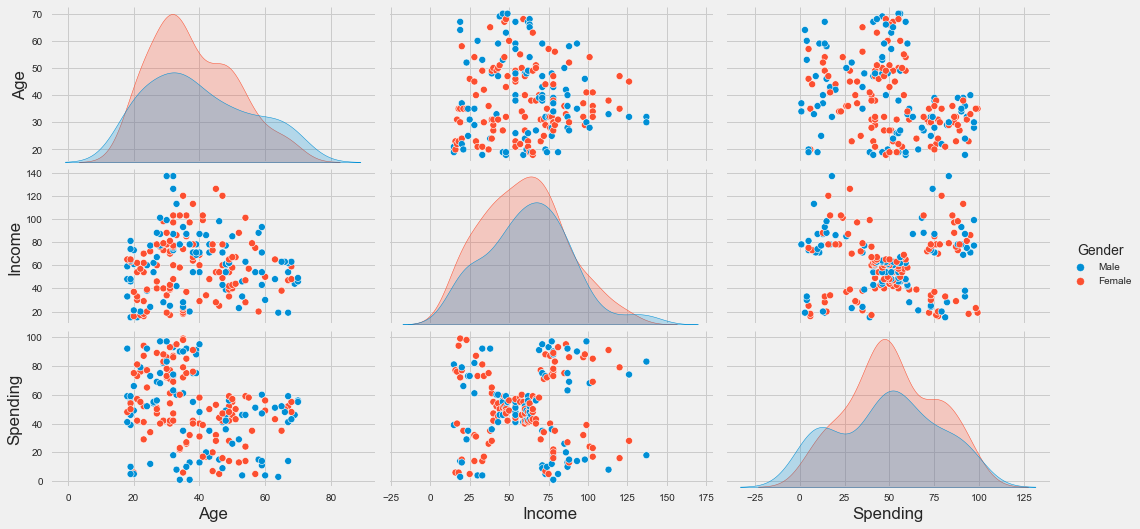

In [24]:
# Pairplot

sns.pairplot(df, hue = "Gender", aspect=2);

In [26]:
# Distribution of Age

fig = px.histogram(df,"Age", color = "Gender",
                   title="<b>Age Distribution</b>",
                   color_discrete_sequence=px.colors.sequential.Sunset_r)

fig.update_traces(marker = {"opacity": 0.7})

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

fig.show()

Inference from above graph - 
- Majority of the customers has age group 20-30 & 30-40
- Majority of the customers are female

In [28]:
# Distribution of Income

fig = px.histogram(df, "Income",
                   color = "Gender",
                   title="<b>Income Distribution</b>",
                   color_discrete_sequence=px.colors.sequential.Sunset_r)

fig.update_traces(marker = {"opacity": 0.7})

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

fig.show()

Inference from above graph -
- Few customers earn more then 120k$ and majority of them are female
- Majority of customers has income between range 60k to80k

In [29]:
# Distribution of Spending

fig = px.histogram(df,"Spending",
                   color = "Gender",
                   title="<b>Spending Distribution</b>",
                   color_discrete_sequence=px.colors.sequential.Sunset_r)

fig.update_traces(marker = {"opacity": 0.7})

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

fig.show()

Creating seperate dataframe

In [30]:
age_income_df = df[['Age','Income']]
income_spending_df = df[['Income','Spending']]

Customer Age vs Income

In [31]:
fig = px.scatter(data_frame=age_income_df,
                 x = age_income_df['Age'],
                 y = age_income_df['Income'],
                 title="<b>Customer Age vs Income</b>",
                 hover_data=['Income'],
                 template = "plotly_dark",
                 color = "Age")

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

Identifying optimal numbers of cluster by elbow method -



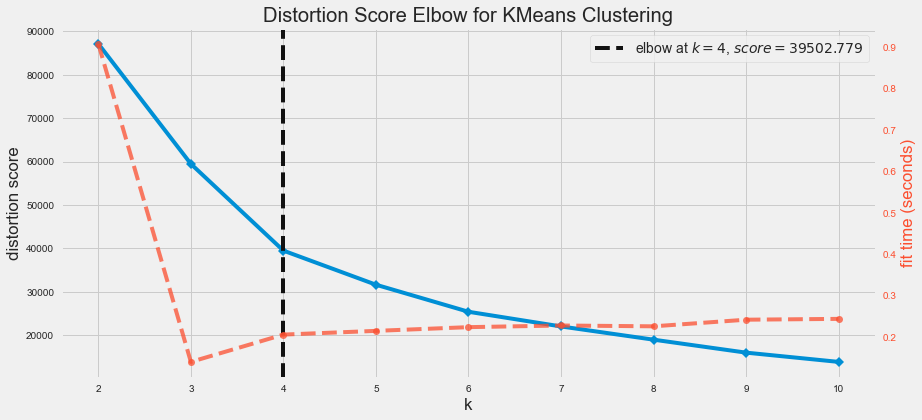

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
plt.figure(figsize = (13,6))
elbow_visualizer = KElbowVisualizer(KMeans(), k = 10)
elbow_visualizer.fit(age_income_df)
elbow_visualizer.show()

4 is the optimal number of clusters for `age_income_df`

Training KMeans Algorithm For Age & Income

In [34]:
model = KMeans(n_clusters = 4)

# Fitting the model
model.fit(age_income_df)

KMeans(n_clusters=4)

In [35]:
# Prediction

cluster_num = model.fit_predict(age_income_df)
cluster_num

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [36]:
# Creating new column Cluster No

age_income_df['Cluster_No'] = cluster_num
age_income_df.head()

,Age,Income,Cluster_No
0,19,15,0
1,21,15,0
2,20,16,0
3,23,16,0
4,31,17,0


In [37]:
cluster_centers = model.cluster_centers_
cluster_centers

array([[ 30.34693878,  29.26530612],
       [ 31.95890411,  72.95890411],
       [ 55.81481481,  51.77777778],
       [ 39.        , 106.5       ]])

In [38]:
cluster_1 = age_income_df[age_income_df['Cluster_No'] == 0]
cluster_2 = age_income_df[age_income_df['Cluster_No'] == 1]
cluster_3 = age_income_df[age_income_df['Cluster_No'] == 2]
cluster_4 = age_income_df[age_income_df['Cluster_No'] == 3]

Visualizing Clusters

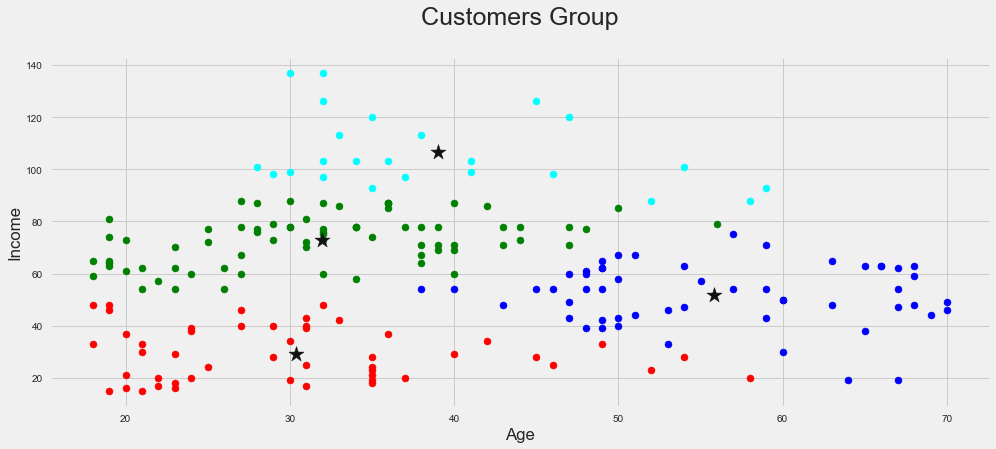

In [39]:
plt.figure(figsize = (15,6))
plt.title("Customers Group\n", size = 25)
plt.scatter(cluster_1['Age'], cluster_1['Income'], color = 'red')
plt.scatter(cluster_2['Age'], cluster_2['Income'], color = 'green')
plt.scatter(cluster_3['Age'], cluster_3['Income'], color = 'blue')
plt.scatter(cluster_4['Age'], cluster_4['Income'], color = 'cyan')

plt.scatter(cluster_centers[:,0], cluster_centers[:, 1], s = 250, c = 'k', marker='*')

plt.xlabel("Age")
plt.ylabel("Income");

Model Prediction

Predict the class customer whose Age is 19 and Income is 15

In [40]:
model.predict([[18,15]])

array([0])

Customer Income vs Spending

In [41]:
fig = px.scatter(data_frame=income_spending_df,
                 x = income_spending_df['Income'],
                 y = income_spending_df['Spending'],
                 title="<b>Customer Income vs Spending</b>",                 
                 template = "plotly_dark",
                 hover_data=['Income'])

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

Identifying optimal numbers of cluster

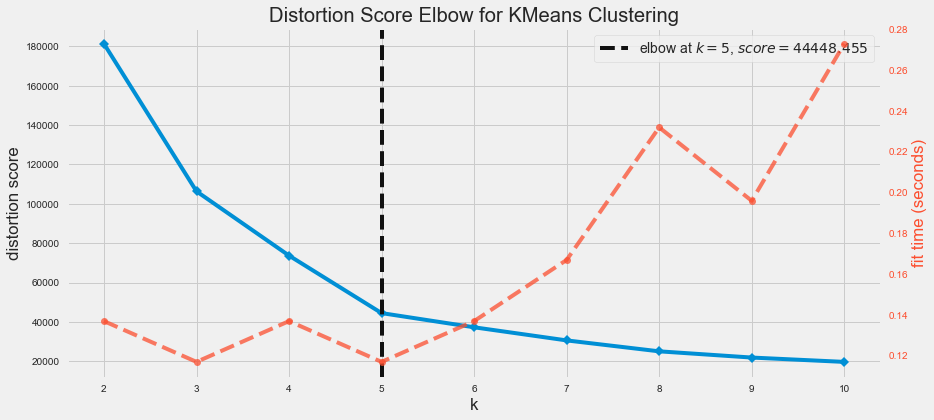

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
plt.figure(figsize = (13,6))
elbow_visualizer = KElbowVisualizer(KMeans(), k = 10)
elbow_visualizer.fit(income_spending_df)
elbow_visualizer.show()

5 is the optimal number of clusters for income_spending_df

Training KMeans Algorithm

In [43]:
model = KMeans(n_clusters=5)
model.fit(income_spending_df)

KMeans(n_clusters=5)

In [44]:
cluster_num = model.fit_predict(income_spending_df)
cluster_num

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [45]:
income_spending_df['Cluster_No'] = cluster_num
income_spending_df.head()

,Income,Spending,Cluster_No
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


In [46]:
cluster_centers = model.cluster_centers_
cluster_centers

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [47]:
cluster_1 = income_spending_df[income_spending_df['Cluster_No'] == 0]
cluster_2 = income_spending_df[income_spending_df['Cluster_No'] == 1]
cluster_3 = income_spending_df[income_spending_df['Cluster_No'] == 2]
cluster_4 = income_spending_df[income_spending_df['Cluster_No'] == 3]
cluster_5 = income_spending_df[income_spending_df['Cluster_No'] == 4]

Visualizing clusters

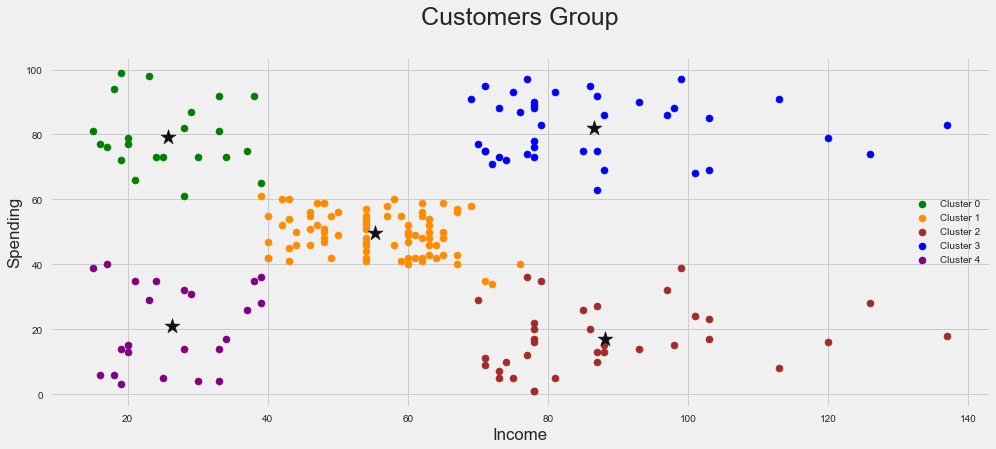

In [48]:
plt.figure(figsize = (15,6))
plt.title("Customers Group\n", size = 25)
plt.scatter(cluster_1['Income'], cluster_1['Spending'], s=50, color = 'green', label = "Cluster 0")
plt.scatter(cluster_2['Income'], cluster_2['Spending'], s=50, color = 'darkorange', label = "Cluster 1")
plt.scatter(cluster_3['Income'], cluster_3['Spending'], s=50, color = 'brown', label = "Cluster 2")
plt.scatter(cluster_4['Income'], cluster_4['Spending'], s=50, color = 'blue', label = 'Cluster 3')
plt.scatter(cluster_5['Income'], cluster_5['Spending'], s=50, color = 'purple', label = 'Cluster 4')

plt.scatter(cluster_centers[:,0], cluster_centers[:, 1], s = 250, c = 'k', marker='*')

plt.xlabel("Income")
plt.ylabel("Spending")
plt.legend();

Model Prediction

Predict the class of customer whose Income is 30 and Spending is 50

In [49]:
model.predict([[30,50]])

array([1])